INGENIERIA EN DESARROLLO Y GESTION DE SOFTWARE

Metricas de evaluacion 

Actividad 4.2


IDGS91

Eliazar Rodriguez Velasco




IMPORTAR LIBRERIAS

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 7


IMPORTAR CSV

In [125]:
df =  pd.read_csv("titanic.csv")

AHORA ANALIZAR EL DATAFRAME


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


DESCRIBIR EL DATASET

In [127]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


CREAR UNA COLUMNA


In [128]:
df['Male'] = df['Sex'] == 'male'

In [129]:
df.head()

,Survived,Pclass,Sex,...,Parents/Children,Fare,Male
0,0,3,male,...,0,7.2500,True
1,1,1,female,...,0,71.2833,False
2,1,3,female,...,0,7.9250,False
3,1,1,female,...,0,53.1000,False
4,0,3,male,...,0,8.0500,True


In [130]:
df['Male'].sum()

573

SCATTER PLOT

Text(0, 0.5, 'Age')

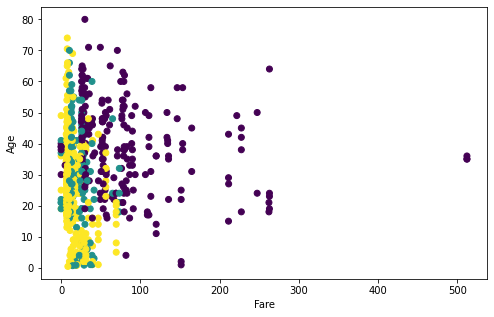

In [131]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Pclass'])
plt.xlabel("Fare")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

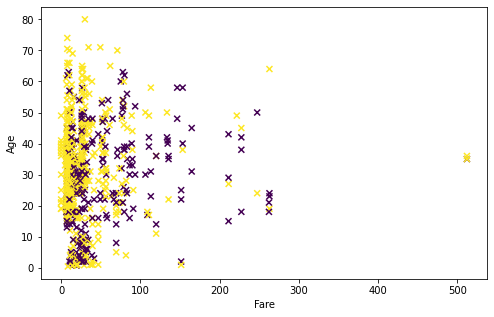

In [132]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Male'], marker="x")
plt.xlabel("Fare")
plt.ylabel("Age")

SEPARAR CARACTERISTICAS Y OBJETIVO

In [133]:
X = df[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']].values
y = df['Survived'].values

In [134]:
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

CONFIGURAR EL MODELO 

In [135]:
model = LogisticRegression()

DIVIDIR EN TRAIN Y TEST

In [114]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=124)

ENTRENAR

In [136]:
model.fit(x_train,y_train)

LogisticRegression()

PREDICCIONES

In [137]:
y_pred= model.predict(x_test)

ANALIZAR LAS PREDICCIONES

In [138]:
x_test.shape

(178, 6)

In [139]:
x_test[0:8]

array([[3, 4.0, 4, 1, 29.125, True],
       [3, 21.0, 0, 0, 7.925, True],
       [1, 45.0, 0, 0, 26.55, True],
       [1, 26.0, 0, 0, 78.85, False],
       [2, 26.0, 0, 0, 10.5, True],
       [1, 41.0, 0, 0, 26.55, True],
       [3, 25.0, 1, 0, 7.925, False],
       [2, 30.0, 3, 0, 21.0, False]], dtype=object)

In [140]:
y_test[0:8]

array([0, 0, 0, 1, 0, 0, 0, 1])

In [169]:
y_pred[0:8]

array([0, 0, 0, 1, 0, 0, 1, 1])

PROBABILIDAD

In [170]:
model.predict_proba(x_test)[6,0]

0.43512149983433746

In [171]:
model.predict_proba(x_test)[6,1]

0.5648785001656625

In [172]:
y.shape 

(887,)

In [173]:
y.shape - y.sum()

array([545])

In [174]:
y.sum()

342

METRICAS

In [175]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [177]:
(y_pred == y_test).sum()

141

In [178]:
y_test.shape

(178,)

In [182]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.79213483])

MATRIZ DE CONFUSION 

In [183]:
confusion_matrix(y_test,y_pred)

array([[100,  19],
       [ 18,  41]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


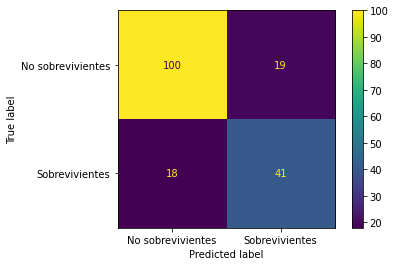

In [188]:
labels = ['No sobrevivientes', 'Sobrevivientes']
plot_confusion_matrix(model,x_test,y_test, display_labels=labels)

In [186]:
print(classification_report(y_test,y_pred, target_names=labels))

              precision    recall  f1-score   support

 Not surived       0.85      0.84      0.84       119
    Survived       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



accuracuy

In [191]:
accuracy = (100 + 41) / (100 + 41 +19 + 18)
accuracy

0.7921348314606742

PRECISION

¿Que proporcion de identificaciones positivas fue realmente correcta?

precision = positivos predichos / predicciones positivas

In [192]:
precision = 41 / (41 + 19)
precision

0.6833333333333333

recall

¿Que proporcion de positivos reales se identifico correctamente?

recall = True positive / (True positive + False negative)

In [193]:
recall = 41 / (41 + 18)
recall

0.6949152542372882

F1 score

In [194]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.6890756302521008

skylearn metrics

In [204]:
print("Accuracuy: {} : {}".format(accuracy,accuracy_score(y_test,y_pred)))

Accuracuy: 0.7921348314606742 : 0.8033707865168539


In [205]:
print("Precision: {} : {}".format(precision,precision_score(y_test,y_pred)))

Precision: 0.6833333333333333 : 0.9


In [206]:
print("Recall: {} : {}".format(recall,recall_score(y_test,y_pred)))

Recall: 0.6949152542372882 : 0.4576271186440678


In [207]:
print("F1 Score: {} : {}".format(f1,f1_score(y_test,y_pred)))

F1 Score: 0.6890756302521008 : 0.6067415730337079


In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       119
           1       0.90      0.46      0.61        59

    accuracy                           0.80       178
   macro avg       0.84      0.72      0.74       178
weighted avg       0.82      0.80      0.78       178



cambiar umbral (treshold)

In [226]:
y_pred=model.predict_proba(x_test)[:,1] > 0.75

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       119
           1       0.90      0.46      0.61        59

    accuracy                           0.80       178
   macro avg       0.84      0.72      0.74       178
weighted avg       0.82      0.80      0.78       178



CONCLUSION

Con el desarrollo de las diferentes actividaddes podemosver que es muy importante conocer y aprender el manejo de los datos ya que gracias a eso podemos obtener una respuesta mas clara a lo que queremos, 